# MNIST Code Along with ANN
Before we start working with Convolutional Neural Networks (CNN), let's model the <a href='https://en.wikipedia.org/wiki/MNIST_database'>MNIST dataset</a> using only linear layers.<br>
In this exercise we'll use the same logic laid out in the ANN notebook. We'll reshape the MNIST data from a 28x28 image to a flattened 1x784 vector to mimic a single row of 784 features.

In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F          # adds some efficiency
from torch.utils.data import DataLoader  # lets us load data in batches
from torchvision import datasets, transforms

import numpy as np
import pandas as pd
from sklearn.metrics import confusion_matrix  # for evaluating results
import matplotlib.pyplot as plt
%matplotlib inline

## Load the MNIST dataset
PyTorch makes the MNIST dataset available through <a href='https://pytorch.org/docs/stable/torchvision/index.html'><tt><strong>torchvision</strong></tt></a>. The first time it's called, the dataset will be downloaded onto your computer to the path specified. From that point, torchvision will always look for a local copy before attempting another download.
### Define transform
As part of the loading process, we can apply multiple transformations (reshape, convert to tensor, normalize, etc.) to the incoming data.<br>For this exercise we only need to convert images to tensors. 

In [2]:
transform = transforms.ToTensor()

In [3]:
train_data = datasets.MNIST(root='Data/processed', train=True, download=True, transform=transform)
train_data

Dataset MNIST
    Number of datapoints: 60000
    Split: train
    Root Location: Data/processed
    Transforms (if any): ToTensor()
    Target Transforms (if any): None

### Load the test set
There's a companion set of MNIST data containing 10,000 records accessible by setting train=False. As before, torchvision will only download this once, and in the future will look for the local copy.

In [4]:
test_data = datasets.MNIST(root='../Data', train=False, download=True, transform=transform)
test_data

Dataset MNIST
    Number of datapoints: 10000
    Split: test
    Root Location: ../Data
    Transforms (if any): ToTensor()
    Target Transforms (if any): None

In [5]:
train_data

Dataset MNIST
    Number of datapoints: 60000
    Split: train
    Root Location: Data/processed
    Transforms (if any): ToTensor()
    Target Transforms (if any): None

In [6]:
test_data

Dataset MNIST
    Number of datapoints: 10000
    Split: test
    Root Location: ../Data
    Transforms (if any): ToTensor()
    Target Transforms (if any): None

In [7]:
type(train_data)

torchvision.datasets.mnist.MNIST

In [8]:
# Train data is a list of lists
# In each list represents pixel by pixel information,
# NOTE: Each image is 28 x 28 pixels
# In each main list, there are 28 sub-lists, each having 28 elements
# Each main list also has the label (0-9)

train_data[0]

(tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 

In [9]:
# There should be 60000 images, this 60000 main-lists in list

len(train_data)

60000

In [10]:
image, label = train_data[0]

In [11]:
image.shape

torch.Size([1, 28, 28])

### View the image
Matplotlib can interpret pixel values through a variety of <a href='https://matplotlib.org/tutorials/colors/colormaps.html'>colormaps</a>.

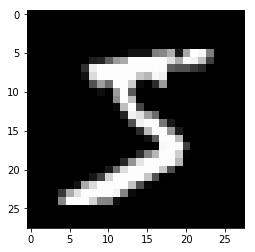

In [12]:
plt.imshow(train_data[0][0].reshape((28,28)), cmap="gray");

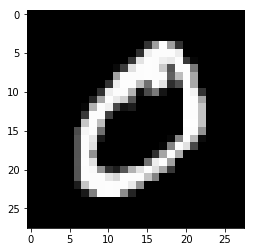

In [13]:
plt.imshow(train_data[1][0].reshape((28,28)), cmap="gray");

In [14]:
torch.manual_seed(101)

# Its always good practice to set shuffle to True
# Shuffle=True means data will shuffled after each epoch
# Because if the test images are all organized to 0s, 1s, 2s etc.
# If the model is trained with this organized set of images
# Then the model will get really good at interpreting 0s and 
# then when 1 comes, the model will retrain to interpret 1 and so on

train_loader = DataLoader(train_data, batch_size=100, shuffle=True)

# Test data doesn't need to be shuffled
test_loader = DataLoader(test_data, batch_size=500, shuffle=False)

### View a batch of images
Once we've defined a DataLoader, we can create a grid of images using <a href='https://pytorch.org/docs/stable/torchvision/utils.html#torchvision.utils.make_grid'><tt><strong>torchvision.utils.make_grid</strong></tt></a>

#### This is just for printing a batch of images from training set

In [15]:
from torchvision.utils import make_grid

np.set_printoptions(formatter=dict(int=lambda x: f'{x:4}')) # to widen the printed array

# Grab the first batch of images
for images,labels in train_loader: 
    break

In [16]:
images.shape

torch.Size([100, 1, 28, 28])

The output can be interpreted like this: <br>
([ batch size, 1 color channel, px height, px length ])

In [17]:
labels.shape

torch.Size([100])

100 labels for 100 images

In [18]:
# Print the first 12 labels
print('Labels: ', labels[:12].numpy())

Labels:  [   0    5    7    8    6    7    9    7    1    3    8    4]


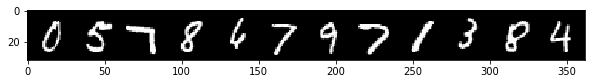

In [19]:
# Print the first 12 images
im = make_grid(images[:12], nrow=12)  # the default nrow is 8
plt.figure(figsize=(10,4))

# We need to transpose the images from Color, Width, Height to Width, Height, Color
# Because thats the format imshow() expects
# (1,2,0) are the index numbers of images.shape (excluding batch size so index 0 starts from color)
# 1: width, 2: height, 0: color
# essnetially np.transpose(im.numpy(), (1, 2, 0)) does the same thing as train_data[1][0].reshape((28,28)

# Check np.transpose: https://numpy.org/devdocs/reference/generated/numpy.transpose.html

plt.imshow(np.transpose(im.numpy(), (1, 2, 0)));

## Define the model
For this exercise we'll use fully connected layers to develop a <a href='https://en.wikipedia.org/wiki/Multilayer_perceptron'>multilayer perceptron</a>.<br>
Our input size is 784 once we flatten the incoming 28x28 tensors.<br>
Our output size represents the 10 possible digits.<br>
We'll set our hidden layers to [120, 84] for now. Once you've completed the exercise feel free to come back and try different values.

In [20]:
class MultilayerPerceptron(nn.Module):
    def __init__(self, in_sz=784, out_sz=10, layers=[120,84]):
        super().__init__()
        self.fc1 = nn.Linear(in_sz,layers[0])
        self.fc2 = nn.Linear(layers[0],layers[1])
        self.fc3 = nn.Linear(layers[1],out_sz)
    
    def forward(self,X):
        X = F.relu(self.fc1(X))
        X = F.relu(self.fc2(X))
        X = self.fc3(X)
        return F.log_softmax(X, dim=1)  # because its a multi-class classification

In [21]:
torch.manual_seed(101)
model = MultilayerPerceptron()
model

MultilayerPerceptron(
  (fc1): Linear(in_features=784, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)

## Count the model parameters
This optional step shows that the number of trainable parameters in our model matches the equation above.

In [22]:
def count_parameters(model):
    params = [p.numel() for p in model.parameters() if p.requires_grad]
    for item in params:
        print(f'{item:>6}')
    print(f'______\n{sum(params):>6}')

In [23]:
count_parameters(model)

 94080
   120
 10080
    84
   840
    10
______
105214


We have 784 incoming features, hidden layers of 120 and 84 neurons, and 10 output features. Including the bias terms for each layer, the total number of parameters being trained is:<br>

$\begin{split}\quad(784\times120)+120+(120\times84)+84+(84\times10)+10 &=\\
94080+120+10080+84+840+10 &= 105,214\end{split}$<br>

#### Explanation:
#### Input --> Hidden Layer 1
There 784 inputs (since each 28x28 image tensors are flattened) are since each input goes to all 120 neurons <br> 
Each input has a weight parameter multiplied to it <br>
Therefore at input layer, no. of parameters are 784 x 120 = 94080 <br>
Add that with 120 bias terms for hidden layer 1 <br>
<br>
Same goes for the rest of the layers

#### Recall:
The equation at each neuron is: y = weight * x + bias


### CNN would require much less parameters for the same task, which is why CNN is preferred over ANN for image prediction

## Define loss function & optimizer

In [24]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

## Flatten the training data
The batch tensors fed in by DataLoader have a shape of [100, 1, 28, 28] <br>
We want to flatten the training data to a (100, 784) shape <br>

We can flatten them using <tt>.view()</tt>

In [25]:
# -1 means combine 1 x 28 x 28 to 784

# This did not mutate the actual image dataset. It'll be used in model training section
images.view(100,-1).shape

torch.Size([100, 784])

## Train the model
This time we'll run the test data through the model during each epoch, so that we can compare loss & accuracy on the same plot.

<div class="alert alert-info"><strong>A QUICK NOTE: </strong>In the section below marked &nbsp;<tt><em>#Tally the number of correct predictions</em></tt> &nbsp;we include the code
<pre style='background-color:rgb(217,237,247)'>
predicted = torch.max(y_pred.data, 1)[1]</pre>
This uses the <a href='https://pytorch.org/docs/stable/torch.html#torch.max'><tt><strong>torch.max()</strong></tt></a> function. <tt>torch.max()</tt> returns a tensor of maximum values, and a tensor of the indices where the max values were found. In our code we're asking for the index positions of the maximum values along dimension 1. In this way we can match predictions up to image labels.</div>

In [26]:
import time
start_time = time.time()

epochs = 10

# Trackers
train_losses = []
test_losses = []
train_correct = []
test_correct = []

for i in range(epochs):
    
    # Training set correct predictions
    trn_corr = 0
    # Test set correct predictions
    tst_corr = 0
    
    # Run the training batches
    for b, (X_train, y_train) in enumerate(train_loader):
        b+=1
        
        # Apply the model
        y_pred = model(X_train.view(100, -1))  # Here we flatten X_train
        loss = criterion(y_pred, y_train)
 
        # torch.max gets the max probability along axis 1. That's what the 1 in max bracket is for
        # [1] index brings the label corresponding to the highest probability
        # Returns predicted labels for a batch
        predicted = torch.max(y_pred.data, 1)[1]
        
        # Tally the number of correct predictions
        # Summing total number of matches from the batch
        batch_corr = (predicted == y_train).sum()
        trn_corr += batch_corr
        
        # Update parameters
        # Gradients accumulate with every backprop. 
        # To prevent compounding we need to reset the stored gradient for each new epoch.
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        # Print interim results
        if b%200 == 0:
            print(f'epoch: {i:2}  batch: {b:4} [{100*b:6}/60000]  loss: {loss.item():10.8f}  \
accuracy: {trn_corr.item()*100/(100*b):7.3f}%')
    
    # Update train loss & accuracy for the epoch
    train_losses.append(loss)
    train_correct.append(trn_corr)
        
    # Run the testing batches
    with torch.no_grad():
        for b, (X_test, y_test) in enumerate(test_loader):

            # Apply the model
            y_val = model(X_test.view(500, -1))  # Here we flatten X_test

            # Tally the number of correct predictions
            predicted = torch.max(y_val.data, 1)[1] 
            tst_corr += (predicted == y_test).sum()
    
    # Update test loss & accuracy for the epoch
    loss = criterion(y_val, y_test)
    test_losses.append(loss)
    test_correct.append(tst_corr)
        
print(f'\nDuration: {time.time() - start_time:.0f} seconds') # print the time elapsed   

epoch:  0  batch:  200 [ 20000/60000]  loss: 0.28055409  accuracy:  83.040%
epoch:  0  batch:  400 [ 40000/60000]  loss: 0.20303486  accuracy:  87.325%
epoch:  0  batch:  600 [ 60000/60000]  loss: 0.20227623  accuracy:  89.323%
epoch:  1  batch:  200 [ 20000/60000]  loss: 0.14457071  accuracy:  94.560%
epoch:  1  batch:  400 [ 40000/60000]  loss: 0.10489675  accuracy:  95.110%
epoch:  1  batch:  600 [ 60000/60000]  loss: 0.12034713  accuracy:  95.347%
epoch:  2  batch:  200 [ 20000/60000]  loss: 0.11627234  accuracy:  96.530%
epoch:  2  batch:  400 [ 40000/60000]  loss: 0.08906287  accuracy:  96.615%
epoch:  2  batch:  600 [ 60000/60000]  loss: 0.10235459  accuracy:  96.740%
epoch:  3  batch:  200 [ 20000/60000]  loss: 0.05358912  accuracy:  97.475%
epoch:  3  batch:  400 [ 40000/60000]  loss: 0.05533470  accuracy:  97.485%
epoch:  3  batch:  600 [ 60000/60000]  loss: 0.05723272  accuracy:  97.510%
epoch:  4  batch:  200 [ 20000/60000]  loss: 0.12917534  accuracy:  97.960%
epoch:  4  b

#### Just checking what these tensors look like

In [48]:
# There are 100 main arrays (since batch size 100), 
# each with 10 elements (label probabilities)
# y_pred.data extracts just the main arrays
y_pred.data[:5]

tensor([[-2.4771e+01, -2.2136e+01, -2.5257e+01, -1.3922e+01, -1.2347e+01,
         -1.9998e+01, -3.3469e+01, -1.0058e+01, -9.0675e+00, -1.6308e-04],
        [-4.1008e-05, -1.9784e+01, -1.5837e+01, -1.5040e+01, -1.7410e+01,
         -1.8427e+01, -1.1174e+01, -1.8043e+01, -1.9590e+01, -1.0543e+01],
        [-3.1415e+01, -2.9861e+01, -3.4372e+01, -1.1216e+01, -1.3876e+01,
         -1.9123e+01, -4.5643e+01, -1.1894e+01, -1.9747e+01, -2.0981e-05],
        [-2.0516e+01, -3.9291e-04, -1.0686e+01, -1.6712e+01, -1.3454e+01,
         -2.3614e+01, -1.9555e+01, -7.9088e+00, -1.3615e+01, -1.7205e+01],
        [-1.2571e+01, -1.8703e+01, -1.2903e+01, -7.4862e+00, -9.3156e+00,
         -4.8961e+00, -2.1672e+01, -8.3010e+00, -9.4766e+00, -8.4934e-03]])

## Plot the loss and accuracy comparisons

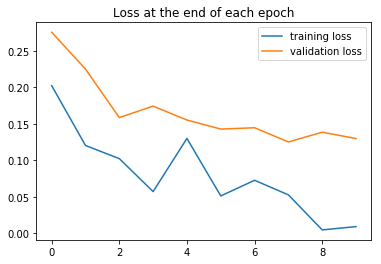

In [49]:
plt.plot(train_losses, label='training loss')
plt.plot(test_losses, label='validation loss')
plt.title('Loss at the end of each epoch')
plt.legend();

Training loss is going down which is good <br>
Validation loss is higher than training loss because the model has never seen this data before and it doesn't have the ability to adjust its weights and bias

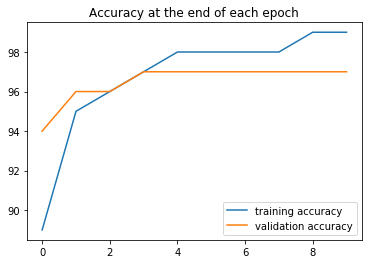

In [50]:
plt.plot([t/600 for t in train_correct], label='training accuracy')
plt.plot([t/100 for t in test_correct], label='validation accuracy')
plt.title('Accuracy at the end of each epoch')
plt.legend();

As training accuracy is not increasing after 5 epochs, after 8 epochs could lead to overfitting

## Evaluate Test Data
We retained the test scores during our training session:

In [52]:
print(test_correct) # contains the results of all 10 epochs
print()
print(f'Test accuracy: {test_correct[-1].item()*100/10000:.3f}%') # print the most recent result as a percent

[tensor(9449), tensor(9600), tensor(9695), tensor(9715), tensor(9738), tensor(9743), tensor(9758), tensor(9772), tensor(9772), tensor(9767)]

Test accuracy: 97.670%


In [53]:
# Extract the data all at once, not in batches
test_load_all = DataLoader(test_data, batch_size=10000, shuffle=False)

In [54]:
with torch.no_grad():
    correct = 0
    for X_test, y_test in test_load_all:
        y_val = model(X_test.view(len(X_test), -1))  # pass in a flattened view of X_test
        predicted = torch.max(y_val,1)[1]
        correct += (predicted == y_test).sum()
print(f'Test accuracy: {correct.item()}/{len(test_data)} = {correct.item()*100/(len(test_data)):7.3f}%')

Test accuracy: 9767/10000 =  97.670%


In [65]:
# print a row of values for reference
np.set_printoptions(formatter=dict(int=lambda x: f'{x:4}'))
print(np.arange(10).reshape(1,10))
print()

# print the confusion matrix
# .view(-1) is to change their dimension but I don't see any difference
print(confusion_matrix(predicted.view(-1), y_test.view(-1)))

[[   0    1    2    3    4    5    6    7    8    9]]

[[ 970    0    2    0    0    3    4    1    4    3]
 [   0 1120    2    0    0    0    3    2    0    2]
 [   1    4 1003    2    2    0    2    5    3    0]
 [   3    3    8  996    1   22    1    2    5    9]
 [   0    0    2    0  962    3    8    1    3   10]
 [   1    0    0    1    0  853    2    0    2    3]
 [   1    2    1    0    4    4  935    0    1    0]
 [   1    1    7    6    4    1    1 1015    5   12]
 [   2    5    6    4    2    6    2    1  949    6]
 [   1    0    1    1    7    0    0    1    2  964]]


Diagonal large numbers are the True Positives <br>
This shows that the model had the greatest success with ones, twos and sevens, and the lowest with fives, sixes and eights.

In [62]:
predicted

tensor([7, 2, 1,  ..., 4, 5, 6])

In [63]:
y_test

tensor([7, 2, 1,  ..., 4, 5, 6])

In [64]:
predicted.view(-1)

tensor([7, 2, 1,  ..., 4, 5, 6])